# Exploratory Data Analysis on all fluid inclusion data (not geolocated)

- Clean data - DONE
- Use [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)
  - This did not work due to:
      `MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64`
- Use [missingno](https://github.com/ResidentMario/missingno) as first pass
- Use [seaborn](https://seaborn.pydata.org/examples/index.html) for quick plots

Data files:

In [3]:
clean = './data/cleaned_types.csv'

Imports

In [25]:
import numpy as np
import pandas as pd

import missingno as msno
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.options.display.max_columns = None

## First pass

In [52]:
df = pd.read_csv(clean)
df.head()

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,AMU16,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,AMU28,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,AMU39,AMU40,AMU41,AMU42,AMU43,AMU44,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.9,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.0,0.0,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.1,415.6,154.60,0.00,238.50,283.8,593.2,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.30,93.72,266.4,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.691,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.0,0.0,0.0,0.0,596.9,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.00,0.0000,6.527,1607.00,2109.0,31.710,0.00,31.41,37.170,28.190,0.000,5.205,14.820,0.00,0.0,1022.0,0.0,106.0,102.7,21.21,79.68,130.100,0.00,30.26,0.00,2.570,258.5,210.8,0.0,0.000,472.1,0.0,0.00,0.00,285.30,67.74,0.00,0.00,0.00,69.27,0.0,7009.0,29.7300,NaN,0.00,0.0,442.7,0.00,145.70,0.000,0.0,1055.0,0.0,0.000,10960000.0,0.0,41.940,0.0,0.000,0.00,0.00,0.0,0.00,2434.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.4,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.0,0.0,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.0,324.6,15.44,18.17,96.81,70.5,381.1,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.64,75.92,200.3,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.0,0.0,0.0,0.0,51.1,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.39,0.1626,0.000,169.80,1927.0,0.000,20.53,33.24,7.305,2.915,19.460,27.590,18.990,17.27,61.2,0.0,1776.0,278.7,145.3,123.90,97.80,7.901,77.50,0.00,0.00,0.000,0.0,0.0,684.4,0.000,561.1,122.9,28.02,15.47,0.00,0.00,0.00,129.60,0.00,0.00,0.0,7181.0,0.0000,NaN,0.00,0.0,0.0,2

In [66]:
df['Well ID'].unique()

array(['15A-17', '23A-17', '23A-19', '24A-8', '337', '349RD2', '38C9',
       '38D9', '41B-8', '46A19RD', '47A-8', '47A-8RD', '51B-16', '52-20',
       '54-7', '54-7RD', nan, '58A-10', '58A10', '58A18', '67-17',
       '67C-17', '68-20', '68-20RD', '68-6', '73-19', '83B-16', '84-30',
       '86-17', '88-20'], dtype=object)

In [67]:
len(df['Well ID'].unique())

30

In [6]:
df.size

1864704

In [7]:
df.shape

(9712, 192)

<AxesSubplot:>

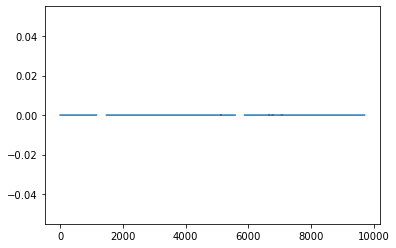

In [8]:
df.AMU1.plot()

In [9]:
# Yields MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64
#profile = ProfileReport(df, title='COSO fluid inclusions profiling')
#profile

We can't load the file into pandas profiling as it's too large but the values need to be floats, we could perhaps change them to float32 to save some space but that probably won't be enough.

From [this](https://www.zdnet.com/article/how-much-does-1-5tb-of-ram-cost/) webpage, 1TB of RAM costs USD12,000 so for 319 TB the base cost would be USD3,828,000

## `missingno`

<AxesSubplot:>

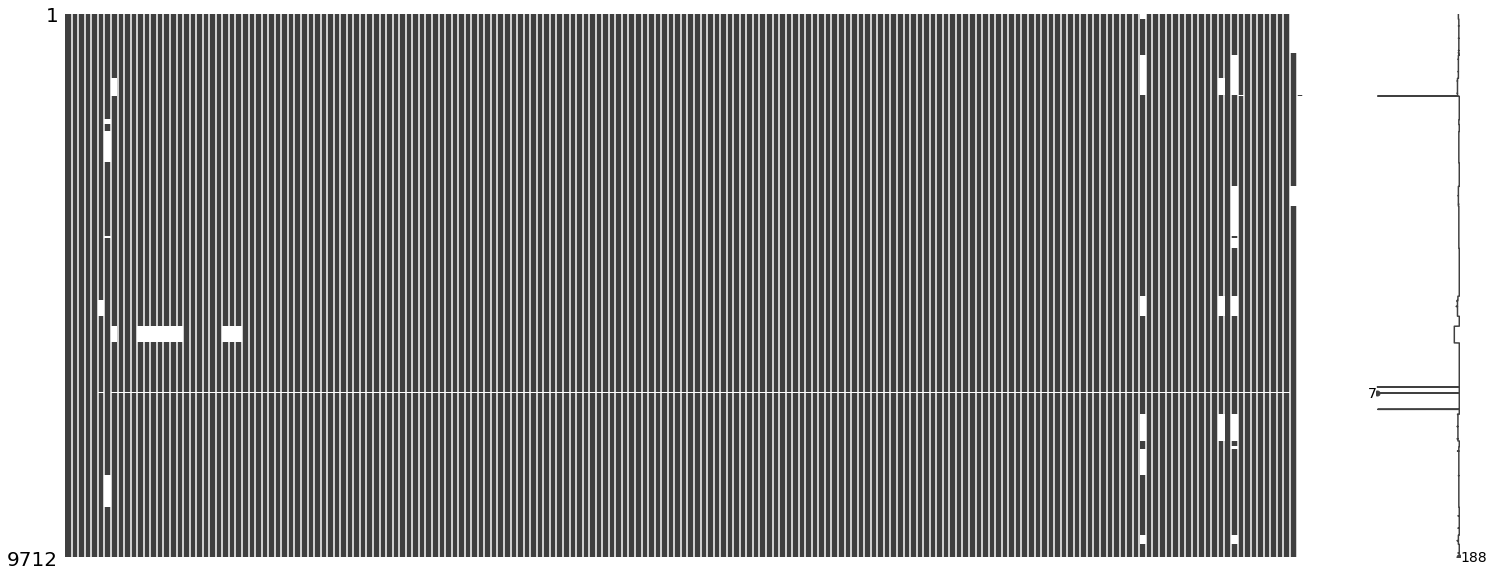

In [10]:
msno.matrix(df)

## Map chemical names to AMU

In [23]:
df.columns[0:20]

Index(['Type', 'Geothermal Province', 'State', 'Field', 'Well ID', 'Sample ID',
       'Depth (ft)', 'AMU1', 'AMU2', 'AMU3', 'AMU4', 'AMU5', 'AMU6', 'AMU7',
       'AMU8', 'AMU9', 'AMU10', 'AMU11', 'AMU12', 'AMU13'],
      dtype='object')

In [60]:
amu_map = {'AMU16':'CH4', 'AMU28':'N2', 'AMU39':'propene',
           'AMU40':'Ar', 'AMU43':'propane', 'AMU44':'CO2'}

df = df.rename(mapper=amu_map, axis=1)
df['N2/Ar'] = df['N2']/df['Ar']
df['CO2/CH4'] = df['CO2']/df['CH4']
df['CO2/N2'] = df['CO2']/df['N2']
df['R1'] = df['N2/Ar'] + df['CO2/CH4']
df['R2'] = df['N2/Ar'] + df['CO2/N2']
df['dCO2/N2'] = df['CO2/N2'].diff()
df['shallow_fluids1'] = df['N2/Ar'] < 200
df['shallow_fluids2'] = df['CO2/CH4'] < 4
df['shallow_fluids3'] = df['propane']/df['propene'] > 1
df['shallow_fluids4'] = 1/df['R1'] > 0.5
df = df.replace([np.inf, -np.inf], 0)

<AxesSubplot:>

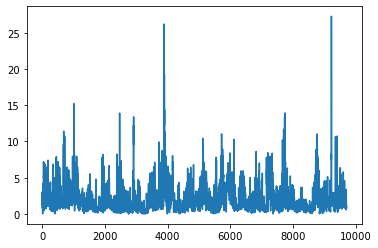

In [64]:
df['CO2/N2'].plot()

<AxesSubplot:>

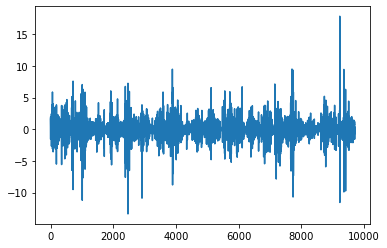

In [63]:
df['dCO2/N2'].plot()